In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/atm-data-m2/atm_data_m2.csv


In [2]:
data = pd.read_csv('../input/atm-data-m2/atm_data_m2.csv')
data.head()

Unnamed: 0        atm_name    weekday festival_religion working_day  \
0          11  Mount Road ATM     MONDAY                NH           W   
1          16  Mount Road ATM    TUESDAY                NH           W   
2          21  Mount Road ATM  WEDNESDAY                NH           W   
3          26  Mount Road ATM   THURSDAY                NH           W   
4          31  Mount Road ATM     FRIDAY                NH           W   

  holiday_sequence  trans_date_set  trans_month  trans_year  prevweek_mean  \
0              WWW               1            1        2011       648600.0   
1              WWW               1            1        2011       648600.0   
2              WWW               1            1        2011       648600.0   
3              WWW               2            1        2011       648600.0   
4              WWW               2            1        2011       648600.0   

   total_amount_withdrawn  
0                  897100  
1                  826000  
2                  754400  
3                  834200  
4                  575300

In [3]:
data['atm_name'].value_counts()
# ATM_Name contains only Road ATM value so its kinda pointless and we'll drop it

Mount Road ATM    2244
Name: atm_name, dtype: int64

In [4]:
data.drop('atm_name', axis=1, inplace=True)

In [5]:
data['festival_religion'].value_counts()

NH    2079
H       70
N       39
M       36
C       20
Name: festival_religion, dtype: int64

In [6]:
data['working_day'].value_counts()
# W = Working Day
# H = Holiday

W    1281
H     963
Name: working_day, dtype: int64

In [7]:
data['festival_religion'].value_counts()
# The various religions are NH, H, N, M, C
# I'm assuming NH = Not Holiday

NH    2079
H       70
N       39
M       36
C       20
Name: festival_religion, dtype: int64

In [8]:
# Trying to figure out what do all these festival_religion terms mean
data[data['working_day'] == 'H']['festival_religion'].value_counts()

NH    800
H      68
N      39
M      36
C      20
Name: festival_religion, dtype: int64

In [9]:
data[data['working_day'] == 'W']['festival_religion'].value_counts()
# Working days generally have NH, so it could stand for No Holiday

NH    1279
H        2
Name: festival_religion, dtype: int64

In [10]:
data[(data['working_day'] == 'H') & (data['festival_religion'] == 'NH')]['weekday'].value_counts()
# Seems like NH stands for Normal Holiday

SUNDAY      491
SATURDAY    304
MONDAY        5
Name: weekday, dtype: int64

In [11]:
data[(data['working_day'] == 'H') & (data['festival_religion'] == 'C')]['weekday'].value_counts()
# Looks like C = Christianity

SUNDAY       7
FRIDAY       5
TUESDAY      5
THURSDAY     2
WEDNESDAY    1
Name: weekday, dtype: int64

In [12]:
data[data['festival_religion'] == 'M']['weekday'].value_counts()
# Guess M = Muslim

SUNDAY       14
MONDAY        7
TUESDAY       5
WEDNESDAY     3
SATURDAY      3
THURSDAY      2
FRIDAY        2
Name: weekday, dtype: int64

In [13]:
data[data['festival_religion'] == 'N']['weekday'].value_counts()
# The only assumption I can make right now is that N = Non-religious Holiday

TUESDAY      8
WEDNESDAY    8
THURSDAY     7
FRIDAY       5
SUNDAY       5
MONDAY       4
SATURDAY     2
Name: weekday, dtype: int64

In [14]:
data['holiday_sequence'].value_counts()

WWW    703
HHW    542
WHH    320
HWW    278
WWH    271
WHW     55
HHH     48
HWH     27
Name: holiday_sequence, dtype: int64

In [15]:
# Trying to figure out what does holiday_sequence mean
data[:15]
# Alright so from observing this, I can infer that for example, the holiday_sequence value "WHW" indicates that today is a Holiday (the middle H)
# yesterday was a Working Day (the first W) and tomorrow is also a Working Day (the last W)

Unnamed: 0    weekday festival_religion working_day holiday_sequence  \
0           11     MONDAY                NH           W              WWW   
1           16    TUESDAY                NH           W              WWW   
2           21  WEDNESDAY                NH           W              WWW   
3           26   THURSDAY                NH           W              WWW   
4           31     FRIDAY                NH           W              WWW   
5           36   SATURDAY                NH           H              WHH   
6           41     SUNDAY                NH           H              HHW   
7           46     MONDAY                NH           W              HWW   
8           51    TUESDAY                NH           W              WWW   
9           56  WEDNESDAY                NH           W              WWW   
10          61   THURSDAY                NH           W              WWW   
11          66     FRIDAY                NH           W              WWH   
12          71   SATURDAY                 H           H              WHH   
13          76     SUNDAY                 H           H              HHH   
14          81     MONDAY                 H           H              HHW   

    trans_date_set  trans_month  trans_year  prevweek_mean  \
0                1            1        2011       648600.0   
1                1            1        2011       648600.0   
2                1            1        2011       648600.0   
3                2            1        2011       648600.0   
4                2            1        2011       648600.0   
5                2            1        2011       648600.0   
6                2            1        2011       648600.0   
7                2            1        2011       775929.0   
8                3            1        2011       775929.0   
9                3            1        2011       775929.0   
10               3            1        2011       775929.0   
11               3            1        2011       775929.0   
12               3            1        2011       775929.0   
13               4            1        2011       775929.0   
14               4            1        2011       459900.0   

    total_amount_withdrawn  
0                   897100  
1                   826000  
2                   754400  
3                   834200  
4                   575300  
5                   792700  
6                   751800  
7                   702200  
8                   506000  
9                   647600  
10                  506300  
11                  451400  
12                  200500  
13                  205300  
14                  221900

In [16]:
# data['holiday_sequence'].unique()

In [17]:
amount_withdrawn_mean_list = []
sequence_list = data['holiday_sequence'].unique()

for sequence in sequence_list:
    amount_withdrawn_mean_list.append(np.mean(data[data['holiday_sequence'] == sequence]['total_amount_withdrawn'].sum()))

Text(0, 0.5, 'Mean Amount Withdrawn')

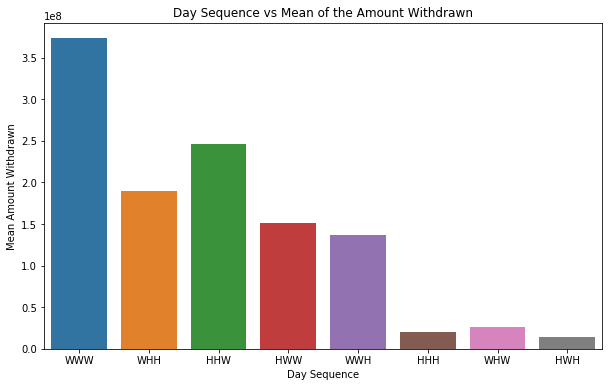

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Plotting each of the sequences versus the mean of the amount withdrawn on the entirety of that particular sequence
plt.figure(figsize=(10,6))

sns.barplot(x=sequence_list, y=amount_withdrawn_mean_list)
plt.title('Day Sequence vs Mean of the Amount Withdrawn')
plt.xlabel('Day Sequence')
plt.ylabel('Mean Amount Withdrawn')

# Note that the mean amount withdrawm seems to be in correlation with the frequencies of each of these sequences, i.e., WWW occurs most often, 
# followed by HHW and WHH, and the largest mean amount withdrawals also happen in the same sequence

# Inference: It seems that largest withdrawals on average happen on days with sequence 'WWW' which could be any day from Tuesday to Thursday
# followed by 'HHW' which is most likely a Sunday and then 'WHH' which is most likely a Saturday

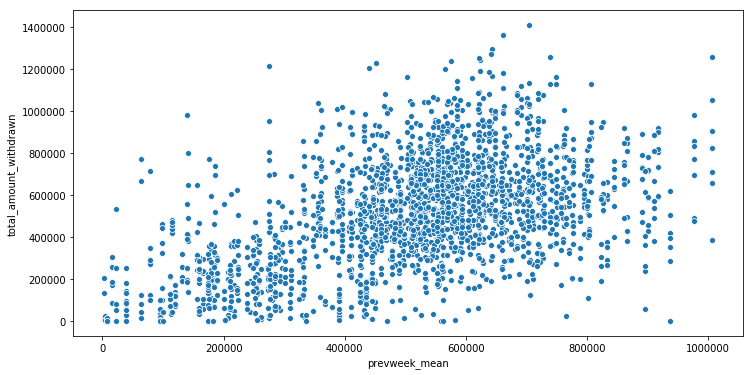

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot('prevweek_mean', 'total_amount_withdrawn', data=data)
# There is a bit of a positive correlation between the two attributes but still the affect of outliers is too much

In [20]:
data[['prevweek_mean', 'total_amount_withdrawn']].corr()
# So the actual correlation is 0.5024

prevweek_mean  total_amount_withdrawn
prevweek_mean                1.000000                0.502479
total_amount_withdrawn       0.502479                1.000000

In [21]:
data.corr()
# So prevweek_mean has the biggest positive impact on the total amount withdrawn

Unnamed: 0  trans_date_set  trans_month  trans_year  \
Unnamed: 0                1.000000        0.021001     0.076284    0.988592   
trans_date_set            0.021001        1.000000    -0.021240    0.012409   
trans_month               0.076284       -0.021240     1.000000   -0.069692   
trans_year                0.988592        0.012409    -0.069692    1.000000   
prevweek_mean            -0.398706       -0.139400     0.058217   -0.419636   
total_amount_withdrawn   -0.299012       -0.273464     0.038138   -0.311817   

                        prevweek_mean  total_amount_withdrawn  
Unnamed: 0                  -0.398706               -0.299012  
trans_date_set              -0.139400               -0.273464  
trans_month                  0.058217                0.038138  
trans_year                  -0.419636               -0.311817  
prevweek_mean                1.000000                0.502479  
total_amount_withdrawn       0.502479                1.000000

In [25]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
data.head()

weekday festival_religion working_day holiday_sequence  trans_date_set  \
0     MONDAY                NH           W              WWW               1   
1    TUESDAY                NH           W              WWW               1   
2  WEDNESDAY                NH           W              WWW               1   
3   THURSDAY                NH           W              WWW               2   
4     FRIDAY                NH           W              WWW               2   

   trans_month  trans_year  prevweek_mean  total_amount_withdrawn  
0            1        2011       648600.0                  897100  
1            1        2011       648600.0                  826000  
2            1        2011       648600.0                  754400  
3            1        2011       648600.0                  834200  
4            1        2011       648600.0                  575300

In [45]:
data['trans_year'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
weekday                   2244 non-null object
festival_religion         2244 non-null object
working_day               2244 non-null object
holiday_sequence          2244 non-null object
trans_date_set            2244 non-null int64
trans_month               2244 non-null int64
trans_year                2244 non-null int64
prevweek_mean             2244 non-null float64
total_amount_withdrawn    2244 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 157.9+ KB


In [49]:
dummy_data = pd.get_dummies(data[['weekday', 'festival_religion', 'working_day', 'holiday_sequence', 'trans_date_set']], drop_first=True)
transformed_data = pd.concat([dummy_data, data.drop(['weekday', 'festival_religion', 'working_day', 'holiday_sequence', 'trans_date_set'], axis=1)], axis=1)

In [51]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 23 columns):
trans_date_set            2244 non-null int64
weekday_MONDAY            2244 non-null uint8
weekday_SATURDAY          2244 non-null uint8
weekday_SUNDAY            2244 non-null uint8
weekday_THURSDAY          2244 non-null uint8
weekday_TUESDAY           2244 non-null uint8
weekday_WEDNESDAY         2244 non-null uint8
festival_religion_H       2244 non-null uint8
festival_religion_M       2244 non-null uint8
festival_religion_N       2244 non-null uint8
festival_religion_NH      2244 non-null uint8
working_day_W             2244 non-null uint8
holiday_sequence_HHW      2244 non-null uint8
holiday_sequence_HWH      2244 non-null uint8
holiday_sequence_HWW      2244 non-null uint8
holiday_sequence_WHH      2244 non-null uint8
holiday_sequence_WHW      2244 non-null uint8
holiday_sequence_WWH      2244 non-null uint8
holiday_sequence_WWW      2244 non-null uint8
trans_month        

In [53]:
transformed_data.head()

trans_date_set  weekday_MONDAY  weekday_SATURDAY  weekday_SUNDAY  \
0               1               1                 0               0   
1               1               0                 0               0   
2               1               0                 0               0   
3               2               0                 0               0   
4               2               0                 0               0   

   weekday_THURSDAY  weekday_TUESDAY  weekday_WEDNESDAY  festival_religion_H  \
0                 0                0                  0                    0   
1                 0                1                  0                    0   
2                 0                0                  1                    0   
3                 1                0                  0                    0   
4                 0                0                  0                    0   

   festival_religion_M  festival_religion_N  ...  holiday_sequence_HWH  \
0                    0                    0  ...                     0   
1                    0                    0  ...                     0   
2                    0                    0  ...                     0   
3                    0                    0  ...                     0   
4                    0                    0  ...                     0   

   holiday_sequence_HWW  holiday_sequence_WHH  holiday_sequence_WHW  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   holiday_sequence_WWH  holiday_sequence_WWW  trans_month  trans_year  \
0                     0                     1            1        2011   
1                     0                     1            1        2011   
2                     0                     1            1        2011   
3                     0                     1            1        2011   
4                     0                     1            1        2011   

   prevweek_mean  total_amount_withdrawn  
0       648600.0                  897100  
1       648600.0                  826000  
2       648600.0                  754400  
3       648600.0                  834200  
4       648600.0                  575300  

[5 rows x 23 columns]

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = transformed_data.drop('total_amount_withdrawn', axis=1)
y = transformed_data['total_amount_withdrawn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler().fit(X_train)
scaled_X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X.columns)
scaled_X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X.columns)

scaled_X_train

trans_date_set  weekday_MONDAY  weekday_SATURDAY  weekday_SUNDAY  \
0          -1.466652       -0.371054         -0.398336       -0.544472   
1           0.805881       -0.371054         -0.398336        1.836643   
2           1.374014       -0.371054         -0.398336       -0.544472   
3           0.237747       -0.371054         -0.398336       -0.544472   
4           1.374014       -0.371054         -0.398336       -0.544472   
...              ...             ...               ...             ...   
1565        1.374014       -0.371054         -0.398336        1.836643   
1566       -0.330386       -0.371054          2.510443       -0.544472   
1567        0.237747       -0.371054          2.510443       -0.544472   
1568        0.805881       -0.371054         -0.398336       -0.544472   
1569        0.237747        2.695025         -0.398336       -0.544472   

      weekday_THURSDAY  weekday_TUESDAY  weekday_WEDNESDAY  \
0             2.686986        -0.391872          -0.388621   
1            -0.372164        -0.391872          -0.388621   
2            -0.372164        -0.391872          -0.388621   
3             2.686986        -0.391872          -0.388621   
4            -0.372164        -0.391872          -0.388621   
...                ...              ...                ...   
1565         -0.372164        -0.391872          -0.388621   
1566         -0.372164        -0.391872          -0.388621   
1567         -0.372164        -0.391872          -0.388621   
1568         -0.372164        -0.391872           2.573200   
1569         -0.372164        -0.391872          -0.388621   

      festival_religion_H  festival_religion_M  festival_religion_N  ...  \
0               -0.183234            -0.127205             7.861298  ...   
1               -0.183234            -0.127205            -0.127205  ...   
2               -0.183234            -0.127205            -0.127205  ...   
3               -0.183234            -0.127205            -0.127205  ...   
4               -0.183234            -0.127205            -0.127205  ...   
...                   ...                  ...                  ...  ...   
1565            -0.183234            -0.127205            -0.127205  ...   
1566            -0.183234            -0.127205            -0.127205  ...   
1567            -0.183234            -0.127205            -0.127205  ...   
1568            -0.183234            -0.127205            -0.127205  ...   
1569            -0.183234            -0.127205            -0.127205  ...   

      holiday_sequence_HHW  holiday_sequence_HWH  holiday_sequence_HWW  \
0                -0.555278             -0.121932             -0.368829   
1                 1.800901             -0.121932             -0.368829   
2                -0.555278             -0.121932             -0.368829   
3                -0.555278             -0.121932             -0.368829   
4                -0.555278             -0.121932             -0.368829   
...                    ...                   ...                   ...   
1565              1.800901             -0.121932             -0.368829   
1566             -0.555278             -0.121932             -0.368829   
1567             -0.555278             -0.121932             -0.368829   
1568             -0.555278             -0.121932             -0.368829   
1569             -0.555278             -0.121932              2.711285   

      holiday_sequence_WHH  holiday_sequence_WHW  holiday_sequence_WWH  \
0                -0.404753              6.721344             -0.376588   
1                -0.404753             -0.148780             -0.376588   
2                -0.404753             -0.148780              2.655425   
3                -0.404753             -0.148780             -0.376588   
4                -0.404753             -0.148780              2.655425   
...                    ...                   ...                   ...   
1565             -0.404753             -0.148780    

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

error_rate = []
for k in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    predictions = knn.predict(scaled_X_test)
    error_rate.append(np.sqrt(mean_squared_error(y_test, predictions)))

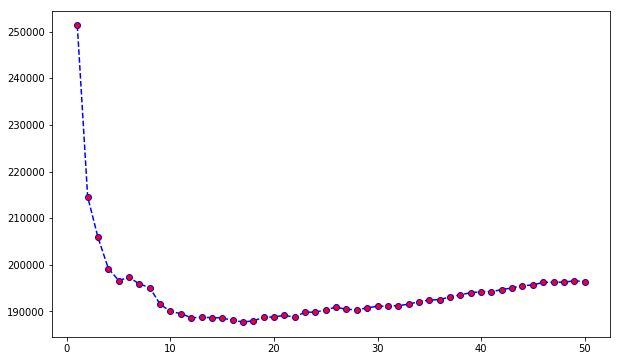

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51), error_rate, linestyle='--', marker='o', markerfacecolor='red', color='blue')

In [78]:
print("Best K: ", error_rate.index(min(error_rate)) - 1)
print("Best RMSE: ", min(error_rate))

Best K:  15
Best RMSE:  187750.87062266355
